In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def explore_ems(ems_df, n=5):
    print("=== EMS DATA EXPLORATION ===")
    print("Rows:", len(ems_df))
    print("Columns:", list(ems_df.columns))
    print("\nHead:")
    print(ems_df.head(n))

    if "Dispatch DtTm" in ems_df.columns:
        ems_df["Dispatch DtTm"] = pd.to_datetime(
            ems_df["Dispatch DtTm"], errors="coerce"
        )

        print("\nDispatch time range:")
        print("  min:", ems_df["Dispatch DtTm"].min())
        print("  max:", ems_df["Dispatch DtTm"].max())

        ems_df["dispatch_hour"] = ems_df["Dispatch DtTm"].dt.hour

    if "Call Type" in ems_df.columns:
        print("\nTop Call Types:")
        print(ems_df["Call Type"].value_counts().head(10))

    if "Unit Type" in ems_df.columns:
        print("\nTop Unit Types:")
        print(ems_df["Unit Type"].value_counts().head(10))

    if "Priority" in ems_df.columns:
        print("\nPriority distribution:")
        print(ems_df["Priority"].value_counts(dropna=False))

    # Missingness
    print("\nMissing values per column:")
    print(ems_df.isna().sum())

    if "dispatch_hour" in ems_df.columns:
        plt.figure()
        ems_df["dispatch_hour"].plot(kind="hist", bins=24)
        plt.xlabel("Dispatch Hour")
        plt.ylabel("Count")
        plt.title("EMS Dispatches by Hour of Day")
        plt.show()

   
    if "Priority" in ems_df.columns:
        plt.figure()
        ems_df["Priority"].value_counts().sort_index().plot(kind="bar")
        plt.xlabel("Priority")
        plt.ylabel("Count")
        plt.title("EMS Calls by Priority")
        plt.show()

    if {"lat", "lon"}.issubset(ems_df.columns):
        plt.figure()
        ems_df.sample(min(5000, len(ems_df)))[["lon", "lat"]].plot(
            kind="scatter", x="lon", y="lat"
        )
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.title("Sample of EMS Incident Locations")
        plt.show()


=== EMS DATA EXPLORATION ===
Rows: 93138
Columns: ['Unnamed: 0', 'Call Number', 'Incident Number', 'Call Type', 'Call Type Group', 'Unit Type', 'Dispatch DtTm', 'Response DtTm', 'On Scene DtTm', 'Priority', 'Original Priority', 'City', 'Address', 'lat', 'lon', 'event_id']

Head:
   Unnamed: 0  Call Number  Incident Number         Call Type  \
0           0    250070822         25003457  Medical Incident   
1           1    250072188         25003652  Medical Incident   
2           2    250070785         25003450  Medical Incident   
3           3    250072250         25003656  Medical Incident   
4           4    250073378         25003794  Medical Incident   

                Call Type Group       Unit Type        Dispatch DtTm  \
0          Non Life-threatening           MEDIC  2025-01-07 09:04:46   
1          Non Life-threatening           MEDIC  2025-01-07 15:23:54   
2  Potentially Life-Threatening           MEDIC  2025-01-07 08:55:16   
3  Potentially Life-Threatening  RESCUE C

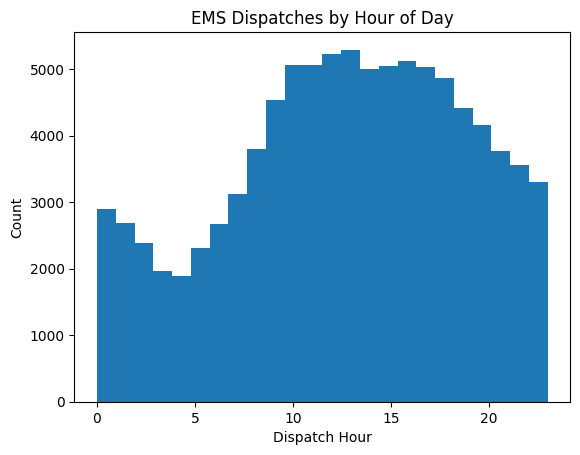

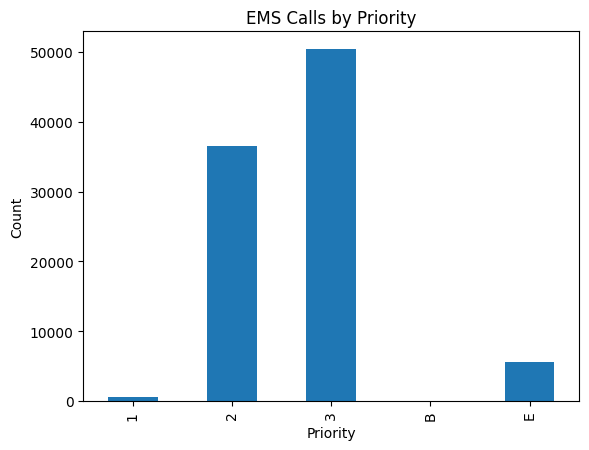

<Figure size 640x480 with 0 Axes>

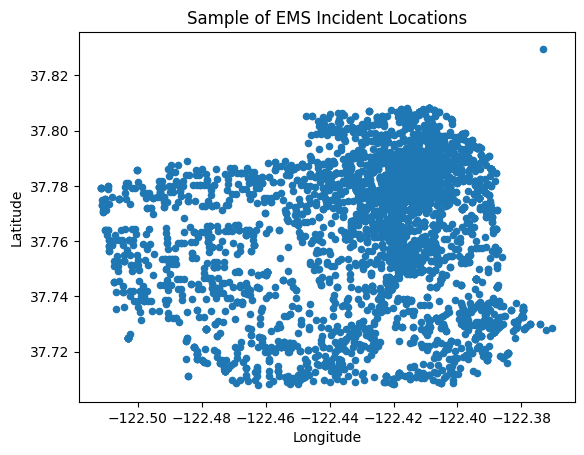

In [25]:
import pandas as pd
ems_events=pd.read_csv("../data/3_clean_dataset/cleaned_emergency_logs.csv")
explore_ems(ems_events)


In [ ]:

def explore_pems_metadata(meta, n=5):
    """meta can be a DataFrame or path to CSV."""
    if isinstance(meta, str):
        meta_df = pd.read_csv(meta)
    else:
        meta_df = meta

    print("=== PEMS METADATA EXPLORATION ===")
    print("Rows:", len(meta_df))
    print("Columns:", list(meta_df.columns))
    print("\nHead:")
    print(meta_df.head(n))

    if "Freeway" in meta_df.columns:
        print("\nFreeways in District 4:")
        print(meta_df["Freeway"].value_counts().head(20))

    if "Freeway Direction" in meta_df.columns:
        print("\nDirections:")
        print(meta_df["Freeway Direction"].value_counts(dropna=False))

    if "Type" in meta_df.columns:
        print("\nStation Types:")
        print(meta_df["Type"].value_counts(dropna=False))

    if "Lanes" in meta_df.columns:
        print("\nLanes summary:")
        print(meta_df["Lanes"].describe())

    if {"Latitude", "Longitude"}.issubset(meta_df.columns):
        print("\nLatitude range:", meta_df["Latitude"].min(), "→", meta_df["Latitude"].max())
        print("Longitude range:", meta_df["Longitude"].min(), "→", meta_df["Longitude"].max())

   
    if "Freeway" in meta_df.columns:
        plt.figure()
        meta_df["Freeway"].value_counts().head(15).plot(kind="bar")
        plt.xlabel("Freeway")
        plt.ylabel("Number of Stations")
        plt.title("Stations per Freeway (Top 15)")
        plt.show()

    if {"Latitude", "Longitude"}.issubset(meta_df.columns):
        plt.figure()
        meta_df.plot(kind="scatter", x="Longitude", y="Latitude")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.title("PeMS Stations in District 4")
        plt.show()


=== PEMS METADATA EXPLORATION ===
Rows: 2569
Columns: ['Unnamed: 0', 'ID', 'Freeway', 'Freeway Direction', 'District', 'Latitude', 'Longitude', 'Type', 'Lanes', 'Name', 'City']

Head:
   Unnamed: 0      ID  Freeway Freeway Direction  District   Latitude  \
0           0  400000      101                 S         4  38.081498   
1           1  400001      101                 N         4  37.364085   
2           2  400002      101                 S         4  37.584097   
3           3  400006      880                 S         4  37.605003   
4           4  400007      101                 N         4  37.586936   

    Longitude Type  Lanes                      Name     City  
0 -122.547963   ML      4         SR-37 conn-s-diag  52582.0  
1 -121.901149   ML      5          NB 880 rm-n-loop  68000.0  
2 -122.328465   ML      5          Peninsula Ave OC  68252.0  
3 -122.065542   ML      4      Whipple Rd rm-s-diag  81204.0  
4 -122.337721   ML      5  2000' N of Pennisula Ave  68252.0  

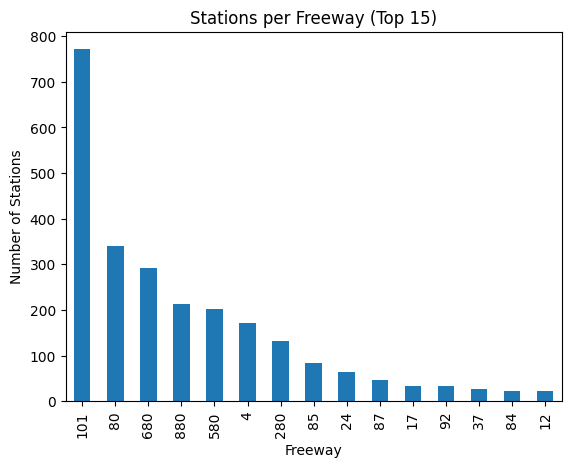

<Figure size 640x480 with 0 Axes>

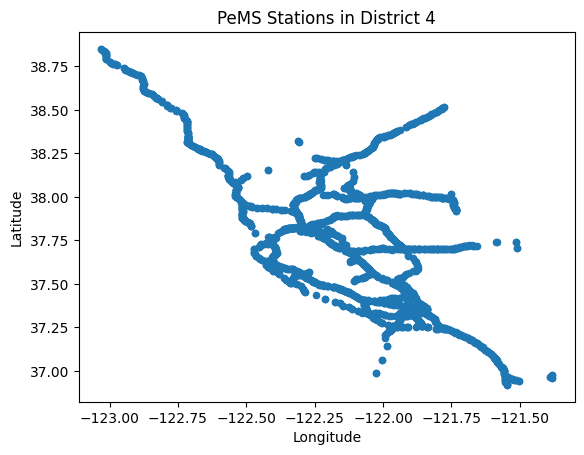

In [21]:
meta_clean = pd.read_csv("../data/3_clean_dataset/cleaned_station_metadata.csv")

explore_pems_metadata(meta_clean)


In [ ]:

def explore_pems_day_parquet(parquet_path, n=5):
    day_df = pd.read_parquet(parquet_path)
    explore_pems_day(day_df, n=n)

def explore_pems_day(day_df, n=5):
    print("=== PEMS 5-MIN STATION DAY EXPLORATION ===")
    print("Rows:", len(day_df))
    print("Columns:", list(day_df.columns))
    print("\nHead:")
    print(day_df.head(n))

    # Time range
    if "Timestamp" in day_df.columns:
        print("\nTimestamp range:")
        print("  min:", day_df["Timestamp"].min())
        print("  max:", day_df["Timestamp"].max())

        day_df["hour"] = day_df["Timestamp"].dt.hour

    # Stations
    if "Station" in day_df.columns:
        print("\nStations in this file:", day_df["Station"].nunique())
        print(day_df["Station"].value_counts().head(10))

    # Summary stats
    for col in ["Total Flow", "Avg Speed", "Avg Occupancy"]:
        if col in day_df.columns:
            print(f"\nSummary for {col}:")
            print(day_df[col].describe())

  
    if "Total Flow" in day_df.columns:
        plt.figure()
        day_df["Total Flow"].plot(kind="hist", bins=50)
        plt.xlabel("Total Flow (veh / 5 min)")
        plt.ylabel("Count")
        plt.title("Distribution of Total Flow (one day, all stations)")
        plt.show()

    if "Avg Speed" in day_df.columns:
        plt.figure()
        day_df["Avg Speed"].plot(kind="hist", bins=50)
        plt.xlabel("Avg Speed (mph)")
        plt.ylabel("Count")
        plt.title("Distribution of Average Speed (one day, all stations)")
        plt.show()

    if {"Timestamp", "Station", "Total Flow"}.issubset(day_df.columns):
        sample_station = day_df["Station"].value_counts().idxmax()
        st = day_df[day_df["Station"] == sample_station].sort_values("Timestamp")

        plt.figure()
        plt.plot(st["Timestamp"], st["Total Flow"])
        plt.xlabel("Time")
        plt.ylabel("Total Flow (veh / 5 min)")
        plt.title(f"Flow over Time for Station {sample_station}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


=== PEMS 5-MIN STATION DAY EXPLORATION ===
Rows: 1183679
Columns: ['Timestamp', 'Station', 'District', 'Freeway', 'Direction of Travel', 'Lane Type', 'Station Length', 'Samples', '% Observed', 'Total Flow', 'Avg Occupancy', 'Avg Speed', '10', '2', '.0012', '74.8', '1', '10.1', '16', '.013', '71', '1.1', '10.2', '6', '.0037', '67.4', '1.2', '10.3', '5', '.0026', '62.8', '1.3', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', '0', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', '0.1', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', '0.2', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', '0.3', 'file_date']

Head:
   Timestamp Station District Freeway Direction of Travel Lane Type  \
0 2025-01-06  400001        4     101                   N        ML   
1 2025-01-06  400002        4     101                   S        ML   
2 2025-01-06  400006        4     880                   S        ML   
3 2025-01-06  400007        4     101              

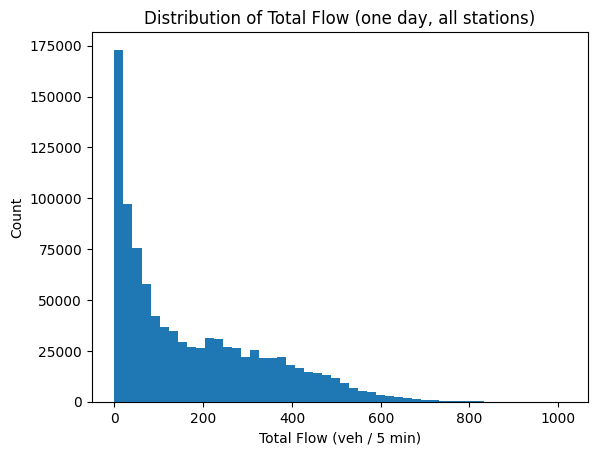

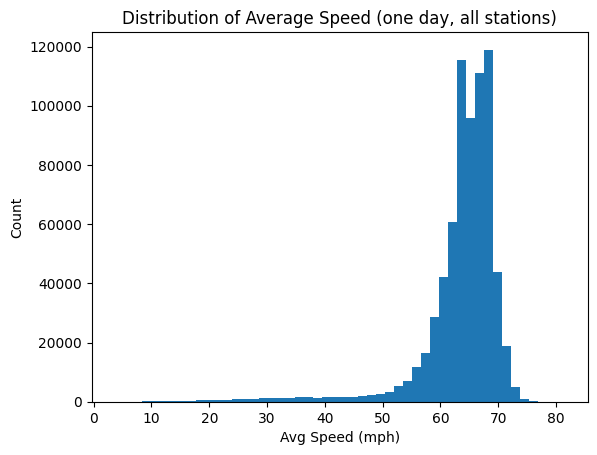

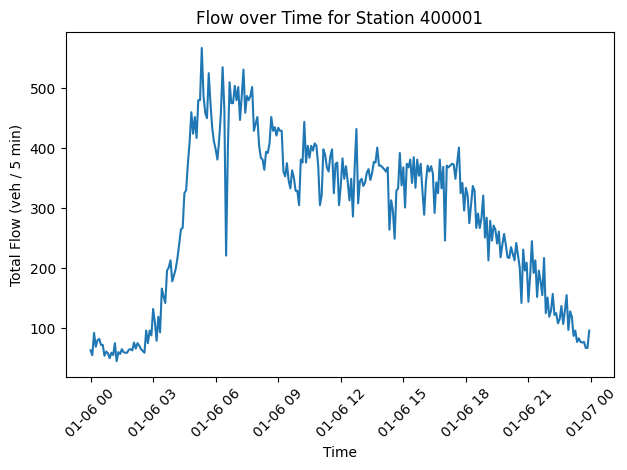

In [23]:
day_parquet = pd.read_parquet("../data/3_clean_dataset/d04_text_station_5min_2025_01_06.parquet")
explore_pems_day(day_parquet)
